In [96]:
!pip install pandas numpy scikit-learn seaborn matplotlib

In [97]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\KIIT\anaconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.2
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.22.4
        scipy: 1.7.1
       Cython: 3.0.8
       pandas: 1.4.4
   matplotlib: 3.7.2
       joblib: 1.3.2
threadpoolctl: 3.5.0

Built with OpenMP: True


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
file_path='WineQT.csv'
data=pd.read_csv(file_path)
data.head()

In [ ]:
print("Shape of the dataset ",data.shape)
print("Columns in the dataset",data.columns)
data.describe()

In [ ]:
print("Missing values in each column ",data.isnull().sum())


In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=data)
plt.title=("Distribution of wine quality ")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title=('Correlation Heatmap')
plt.show()

In [ ]:
X=data.drop(columns=['quality','Id'])
y=data['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
print("Training set class distribution ")
print(y_train.value_counts())
print("\nTesting set class distribution")
print(y_test.value_counts())


In [ ]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42,class_weight="balanced")
rf_model.fit(X_train,y_train)
rf_predictions=rf_model.predict(X_test)
print("Random forest classifier report : ")
print(classification_report(y_test,rf_predictions))
print("Random Forest Accuracy : ",accuracy_score(y_test,rf_predictions))


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
smote=BorderlineSMOTE()
X_resampled,y_resampled=smote.fit_resample(X_train,y_train)

rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_resampled,y_resampled)

rf_predictions=rf_model.predict(X_test)

print("Random Forest Classifier ")
print(classification_report(y_test,rf_predictions))
print("Random Forest Accuracy: ",accuracy_score(y_test,rf_predictions))

In [ ]:
print(classification_report(y_test,rf_predictions,zero_division=0))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,rf_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=np.unique(y),yticklabels=np.unique(y))
plt.title=('Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

rf_predictions=rf_model.predict(X_test)

print("Random Forest Classifier Report : ")
print(classification_report(y_test,rf_predictions))
print("Random Forest Accuracy: ",accuracy_score(y_test,rf_predictions))


In [ ]:
sgd_model=SGDClassifier(random_state=42)
sgd_model.fit(X_train,y_train)

sgd_predictions=sgd_model.predict(X_test)

print("SGD Classifier Report ")
print(classification_report(y_test,sgd_predictions))
print("SGD Accuracy: ",accuracy_score(y_test,sgd_predictions))

In [ ]:
svc_model=SVC(random_state=42)
svc_model.fit(X_train,y_train)

svc_predictions=svc_model.predict(X_test)

print("SVC Classifier Report:")
print(classification_report(y_test,svc_predictions))
print("SVC Accuracy : ",accuracy_score(y_test,svc_predictions))

In [ ]:
def plot_confusion_matrix(cm,title='Confusion Matrix'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title=(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
plot_confusion_matrix(confusion_matrix(y_test,rf_predictions),title='Random Forest Confusion Matrix')
    
plot_confusion_matrix(confusion_matrix(y_test,sgd_predictions), title='SGD Confusion Matrix')
    
plot_confusion_matrix(confusion_matrix(y_test,svc_predictions), title='SVC Confusion Matrix')
    
    

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv(r'C:\ayush\oasis\level2task2\WineQT.csv')

X=data.drop(columns=['quality','Id'])
y=data['quality']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
}
grid_search_rf=GridSearchCV(RandomForestClassifier(random_state=42), param_grid,cv=5,scoring='accuracy')
grid_search_rf.fit(X_train,y_train)

print("Best Parameters for Random Forest : ",grid_search_rf.best_params_)

best_rf_model=grid_search_rf.best_estimator_
rf_predictions=best_rf_model.predict(X_test)

print("Random forest classifier report : ")
print(classification_report(y_test,rf_predictions))
print("Random forest accuracy :",accuracy_score(y_test,rf_predictions))


Best Parameters for Random Forest :  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Random forest classifier report : 
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.78      0.75        96
           6       0.66      0.68      0.67        99
           7       0.70      0.62      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.41      0.41       229
weighted avg       0.67      0.69      0.68       229

Random forest accuracy : 0.6899563318777293


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1000x600 with 0 Axes>

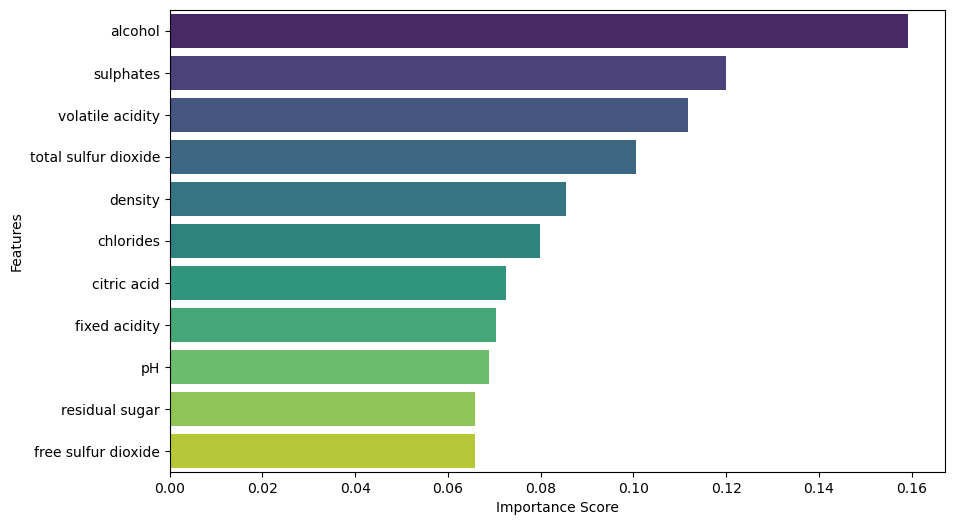

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

best_rf_model=grid_search_rf.best_estimator_

importances=best_rf_model.feature_importances_
feature_importances=pd.DataFrame(importances,index=X.columns,columns=['Importance']).sort_values('Importance',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.Importance,y=feature_importances.index,palette='viridis')
plt.title=('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [103]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(best_rf_model,X,y,cv=5)

print("Cross Validation scores for Random Forest: ",cv_scores)
print("Mean cross-validation score:",cv_scores.mean())

Cross Validation scores for Random Forest:  [0.55021834 0.62008734 0.60262009 0.5877193  0.56578947]
Mean cross-validation score: 0.5852869072243928


In [106]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 

sgd_model=SGDClassifier(random_state=42)
sgd_model.fit(X_train,y_train)

svc_model=SVC(probability=True, random_state=42)
svc_model.fit(X_train,y_train)

voting_clf=VotingClassifier(estimators=[
    ('rf',best_rf_model),
    ('sgd',sgd_model),
    ('svc',svc_model)],
    voting='hard')

voting_clf.fit(X_train,y_train)
voting_predictions=voting_clf.predict(X_test)
print("Voting Classifier Accuracy : ",accuracy_score(y_test, voting_predictions))


Voting Classifier Accuracy :  0.6462882096069869


<Figure size 1400x1000 with 0 Axes>

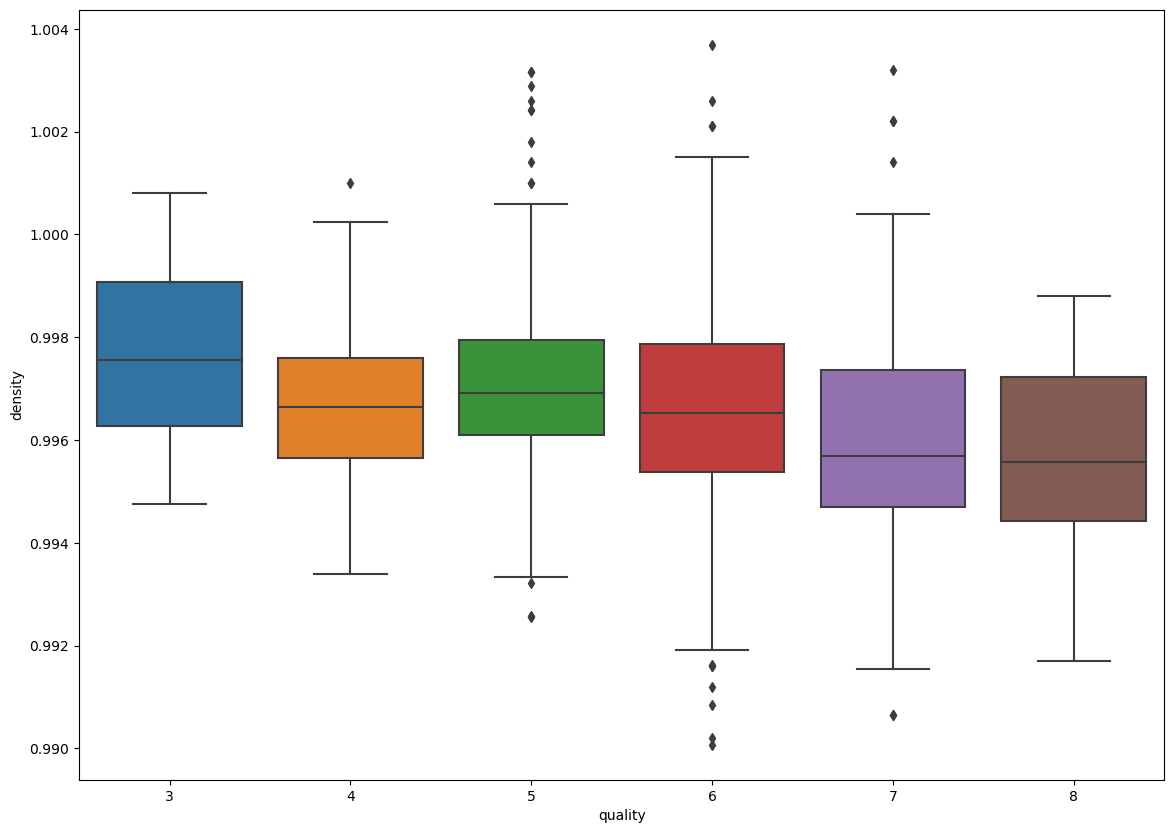

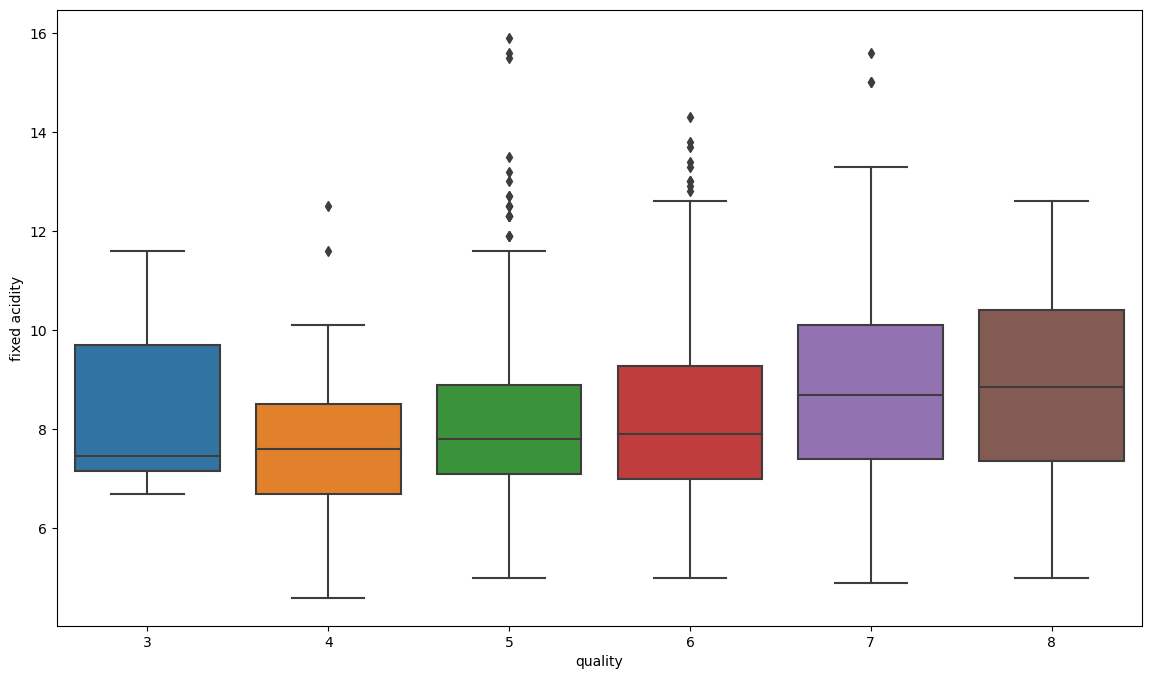

In [108]:
plt.figure(figsize=(14,10))
sns.boxplot(data=data,x='quality',y='density')
plt.title=('Density by Wine Quality')
plt.show()

plt.figure(figsize=(14,8))
sns.boxplot(data=data,x='quality',y='fixed acidity')
plt.title=('Fixed Acidity by Wine Quality')
plt.show()

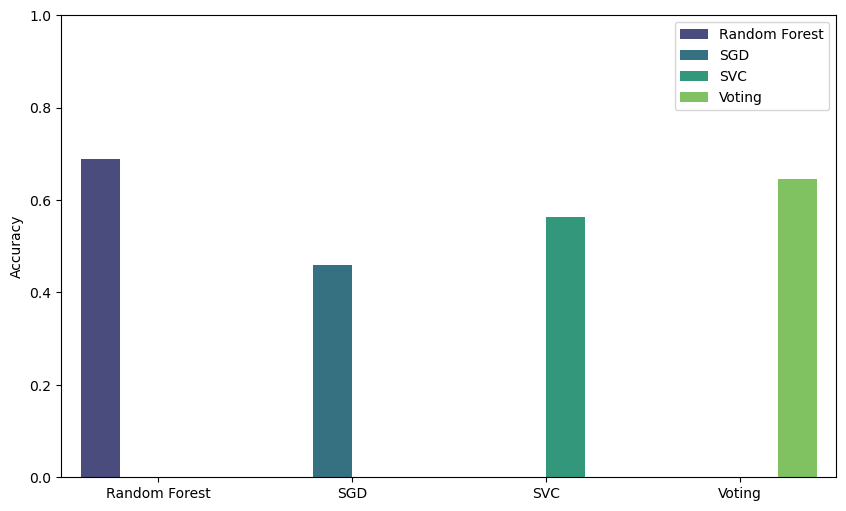

In [109]:
rf_predictions=best_rf_model.predict(X_test)
sgd_predictions=sgd_model.predict(X_test)
svc_predictions=svc_model.predict(X_test)
voting_predictions=voting_clf.predict(X_test)

models=['Random Forest','SGD','SVC','Voting']
scores=[
    accuracy_score(y_test,rf_predictions),
    accuracy_score(y_test,sgd_predictions),
    accuracy_score(y_test,svc_predictions),
    accuracy_score(y_test,voting_predictions)
]

plt.figure(figsize=(10,6))
sns.barplot(x=models,y=scores,palette='viridis',hue=models)
plt.title=('Model Comaprison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [112]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
smote=BorderlineSMOTE()

X_resampled,y_resampled=smote.fit_resample(X,y)

X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled=train_test_split(
X_resampled,y_resampled,test_size=0.2,random_state=42)

rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_resampled,y_train_resampled)

rf_predictions_resampled=rf_model.predict(X_test_resampled)

from sklearn.metrics import classification_report, accuracy_score
print("Random Forest classifier report on resampled data " )
print(classification_report(y_test_resampled,rf_predictions_resampled))
print("Random Forest Accuracy on Resampled Data: ",accuracy_score(y_test_resampled,rf_predictions_resampled))


Random Forest classifier report on resampled data 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.98      0.92      0.95        91
           5       0.75      0.77      0.76       112
           6       0.68      0.67      0.67        91
           7       0.87      0.95      0.91        96
           8       1.00      0.98      0.99        92

    accuracy                           0.85       485
   macro avg       0.71      0.71      0.71       485
weighted avg       0.85      0.85      0.85       485

Random Forest Accuracy on Resampled Data:  0.8494845360824742


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
import joblib
joblib.dump(rf_model,'random_forest_model.pkl')
loaded_rf_model=joblib.load('random_forest_model.pkl')

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

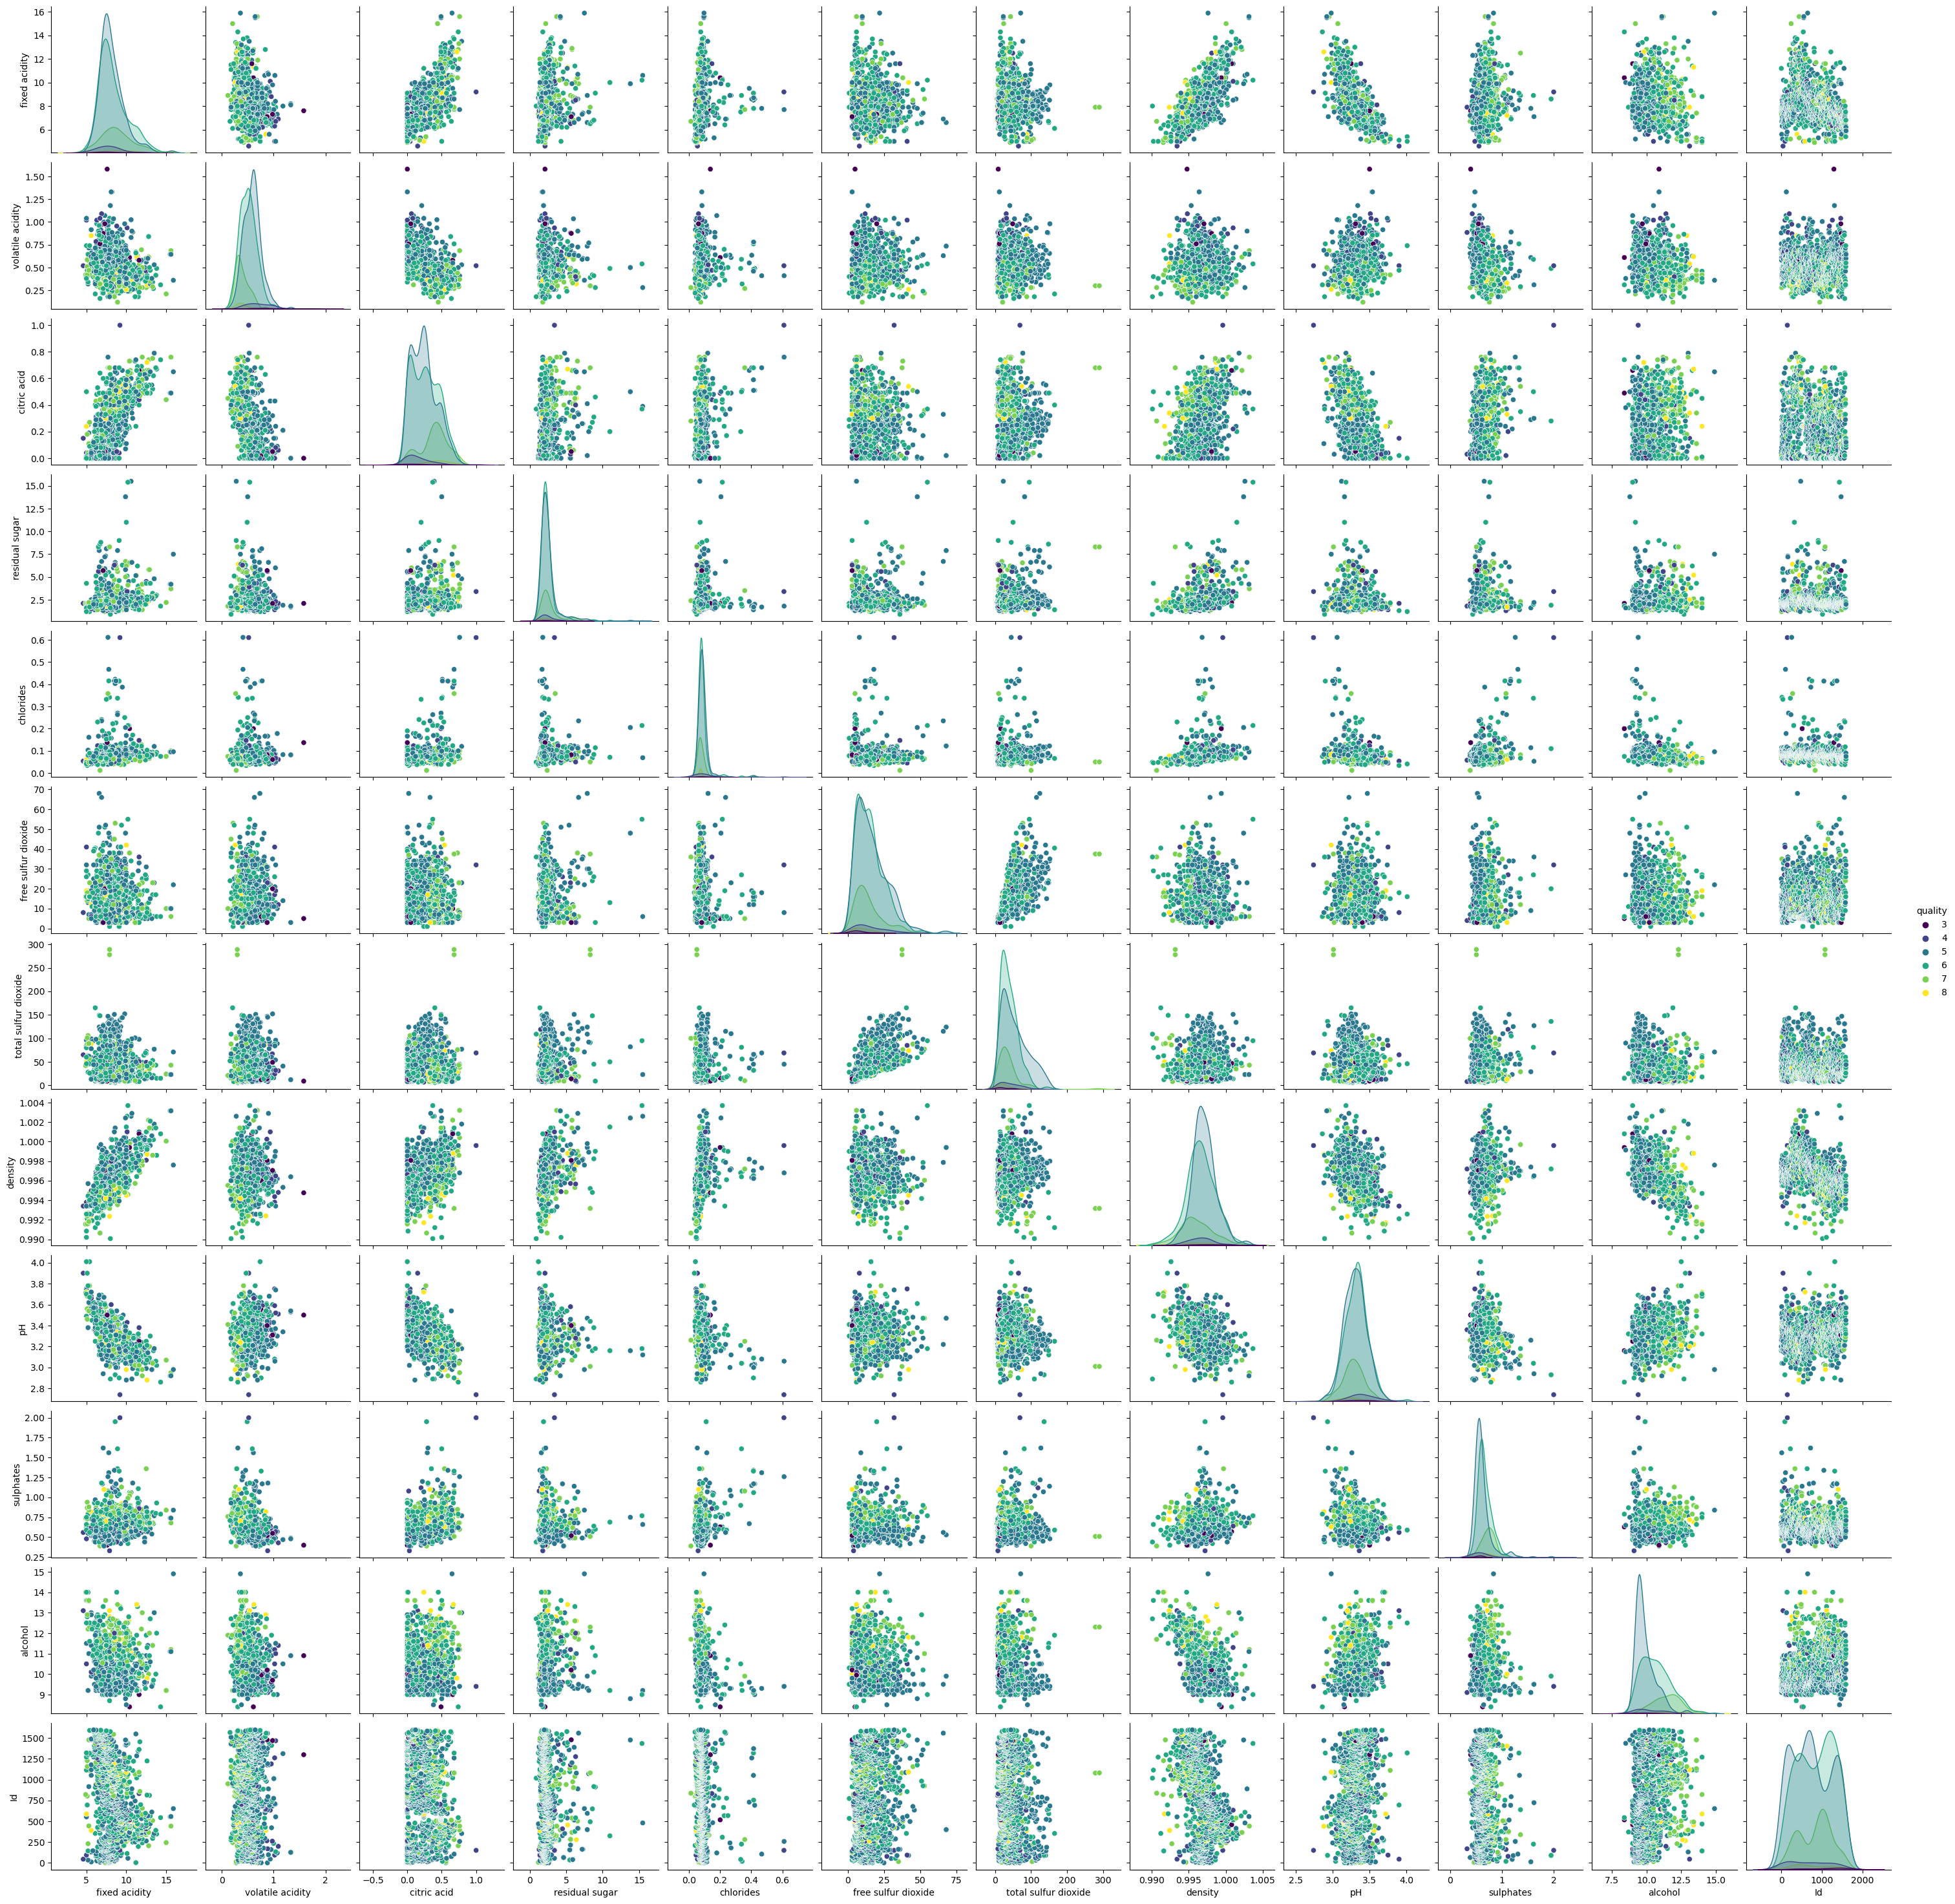

In [114]:
plt.figure(figsize=(12,8))
sns.pairplot(data,hue='quality',palette='viridis',diag_kind='kde')
plt.title=('Pair plot of features coloured by quality')
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


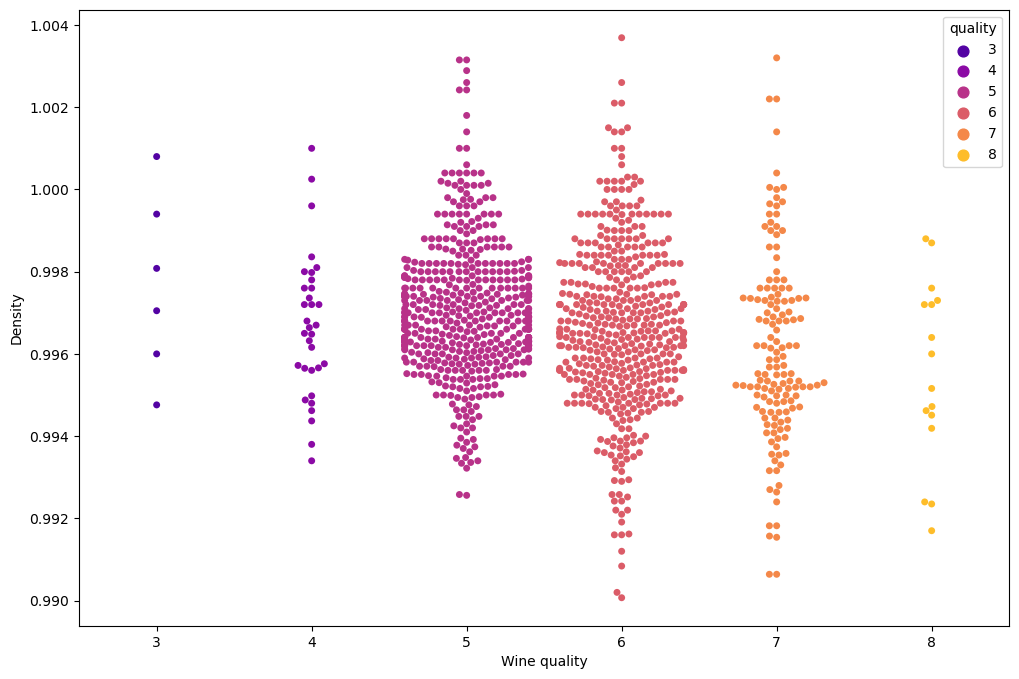

In [115]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='quality',y='density',data=data,hue='quality',palette='plasma')
plt.title=('Density by Wine Quality')
plt.xlabel('Wine quality')
plt.ylabel('Density')
plt.show()

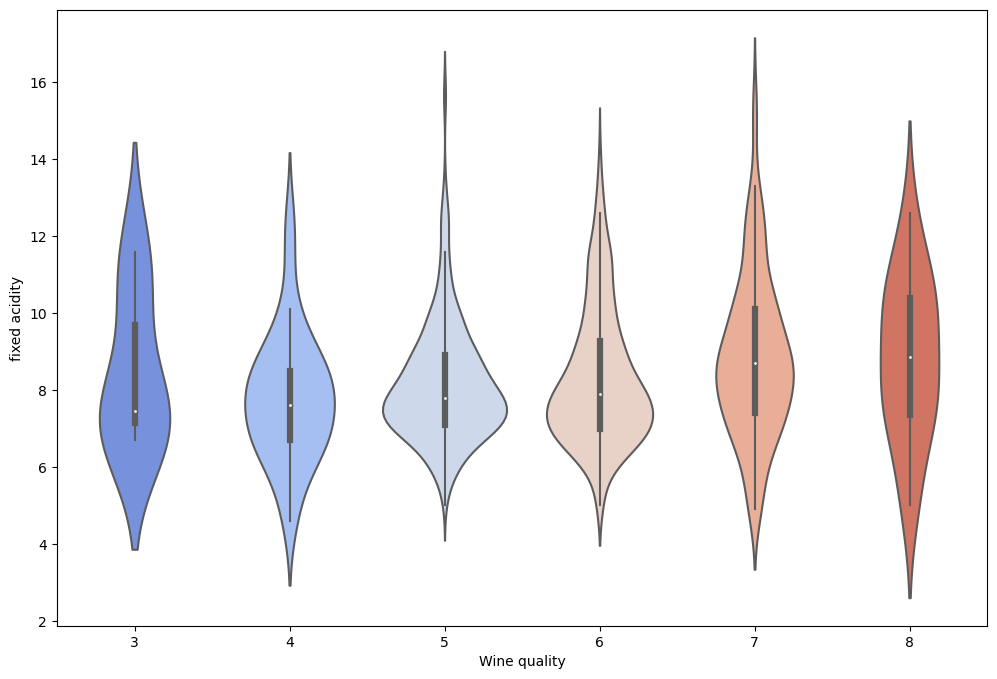

In [116]:
plt.figure(figsize=(12,8))
sns.violinplot(x='quality',y='fixed acidity',data=data ,palette='coolwarm')
plt.title=('fixed acidity distribution by wine quality ')
plt.xlabel('Wine quality')
plt.ylabel('fixed acidity')
plt.show()

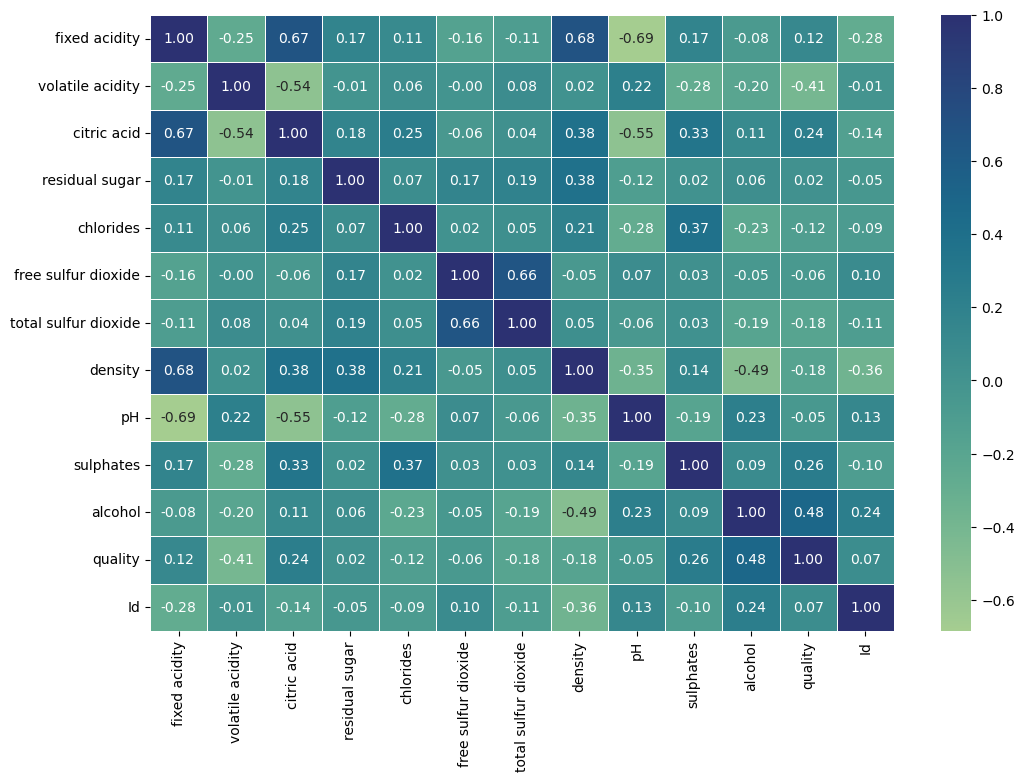

In [117]:
plt.figure(figsize=(12,8))
correlation=data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f',cmap='crest',linewidths=.5)
plt.title=('Correlation heatmap with crest palette')
plt.show()

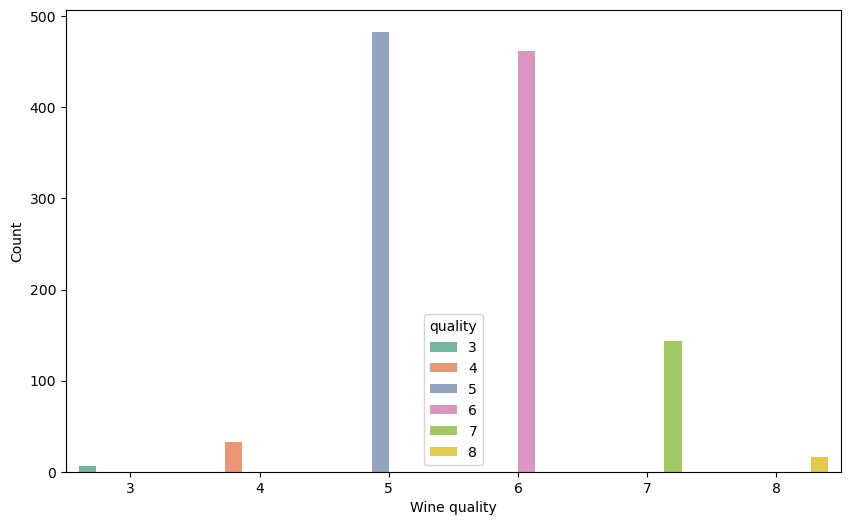

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality',data=data,hue='quality',palette='Set2')
plt.title=('Distribution by Wine Quality')
plt.xlabel('Wine quality')
plt.ylabel('Count')
plt.show()

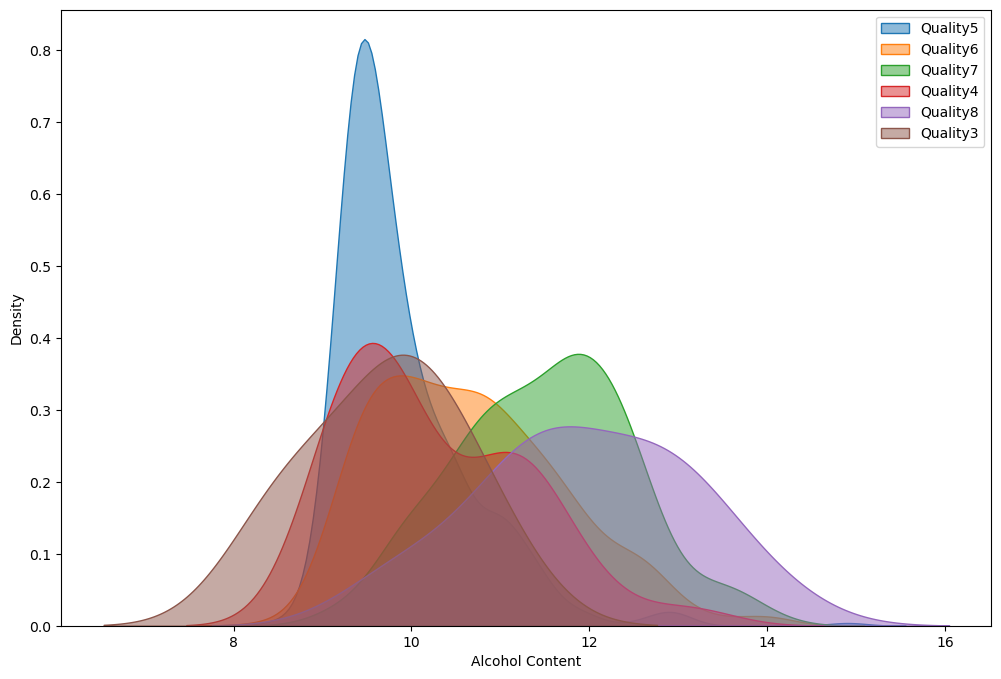

In [119]:
plt.figure(figsize=(12,8))
for quality in data['quality'].unique():
    sns.kdeplot(data[data['quality']== quality]['alcohol'], label=f'Quality{quality}',fill=True,alpha=0.5)
plt.title=('KDE of alcohol content by Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.legend()
plt.show()

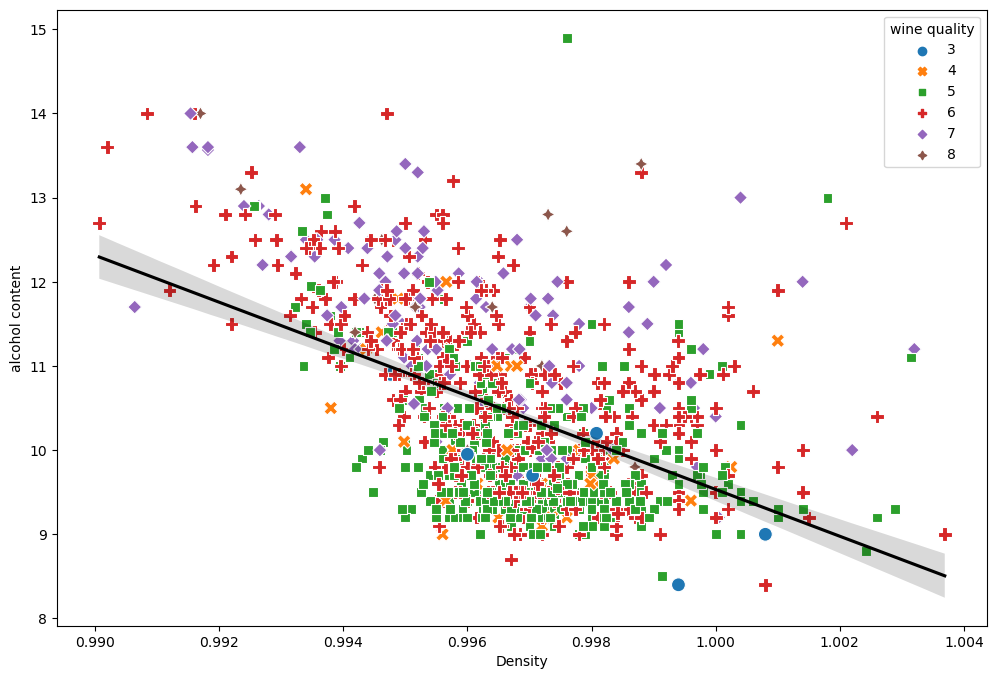

In [120]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='density',y='alcohol',data=data,hue='quality',palette='tab10',style='quality',s=100)
sns.regplot(x='density',y='alcohol',data=data,scatter=False,color='black')
plt.title=('Density vs alcohol content by wine quality')
plt.xlabel('Density')
plt.ylabel('alcohol content')
plt.legend(title='wine quality')
plt.show()

<Figure size 1200x600 with 0 Axes>

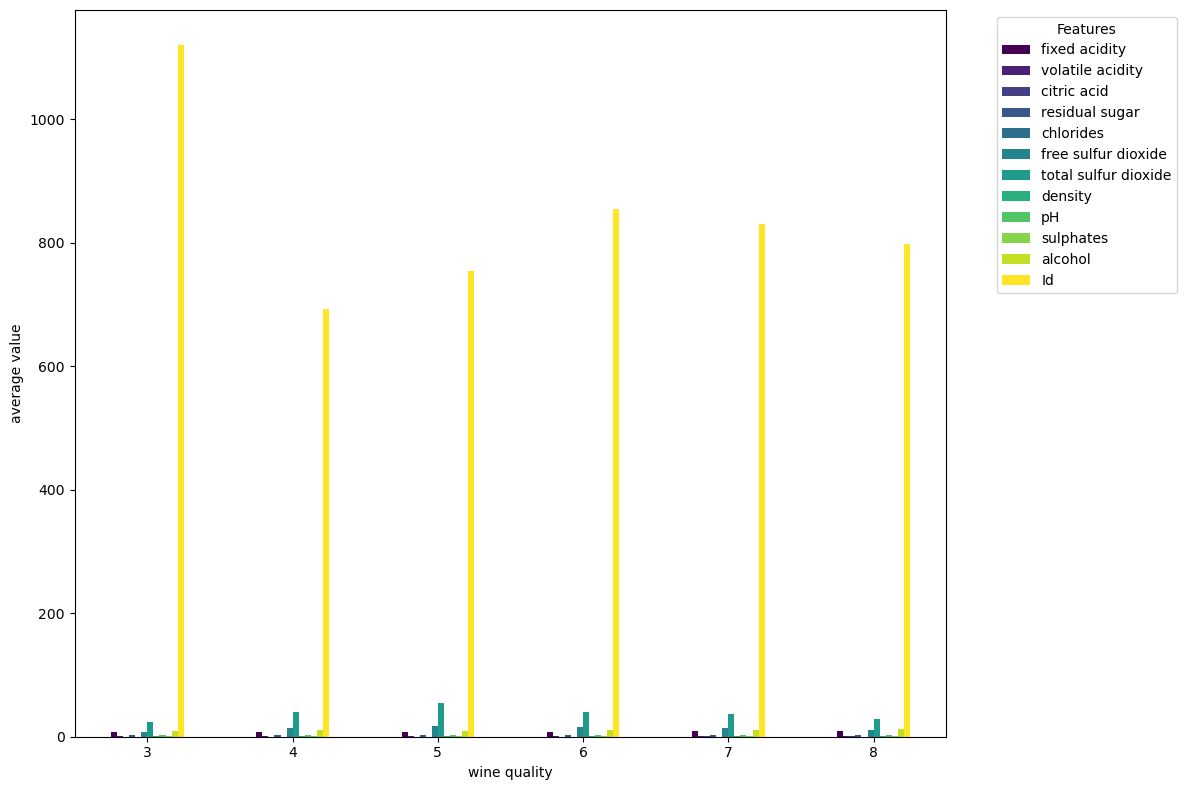

In [121]:
average_features=data.groupby('quality').mean()
plt.figure(figsize=(12,6))
average_features.plot(kind='bar',colormap='viridis',figsize=(12,8))
plt.title=('Average feature values by wine quality ')
plt.ylabel('average value')
plt.xlabel('wine quality')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [122]:
file_path='WineQT.csv'
data=pd.read_csv(file_path)
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [124]:
import pandas as pd
df=pd.read_csv('WineQT.csv')

<Figure size 1200x600 with 0 Axes>

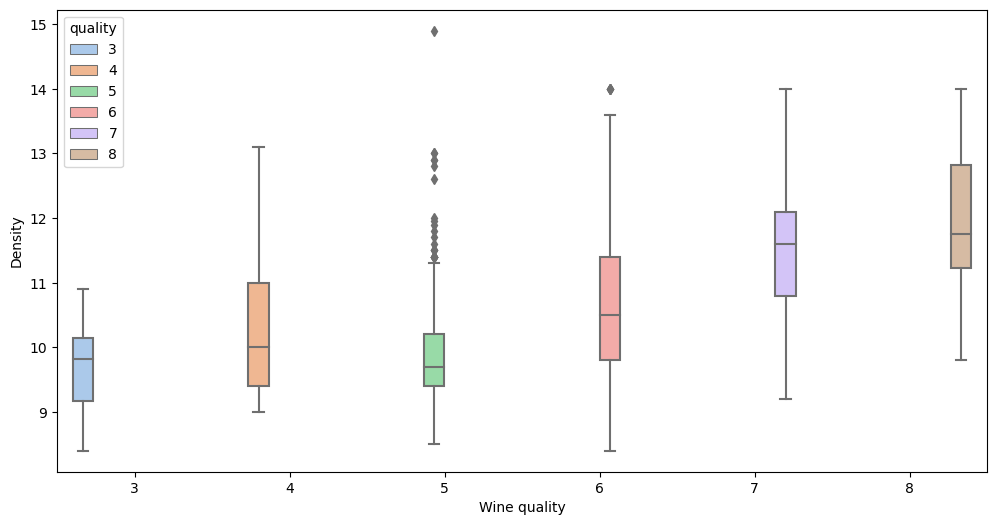

In [125]:
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='alcohol',data=df,hue='quality',palette='pastel')
plt.title=('Alcohol content across wine quality')
plt.xlabel('Wine quality')
plt.ylabel('Density')
plt.show()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

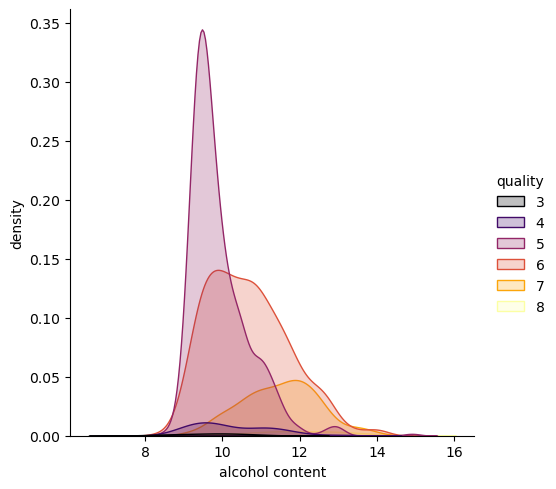

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('WineQT.csv')
print(df.head())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.displot(df,x='alcohol',hue='quality',kind='kde',palette='inferno',fill=True)
plt.title=('distribution of alcohol content by wine quality')
plt.xlabel('alcohol content')
plt.ylabel('density')
plt.show()

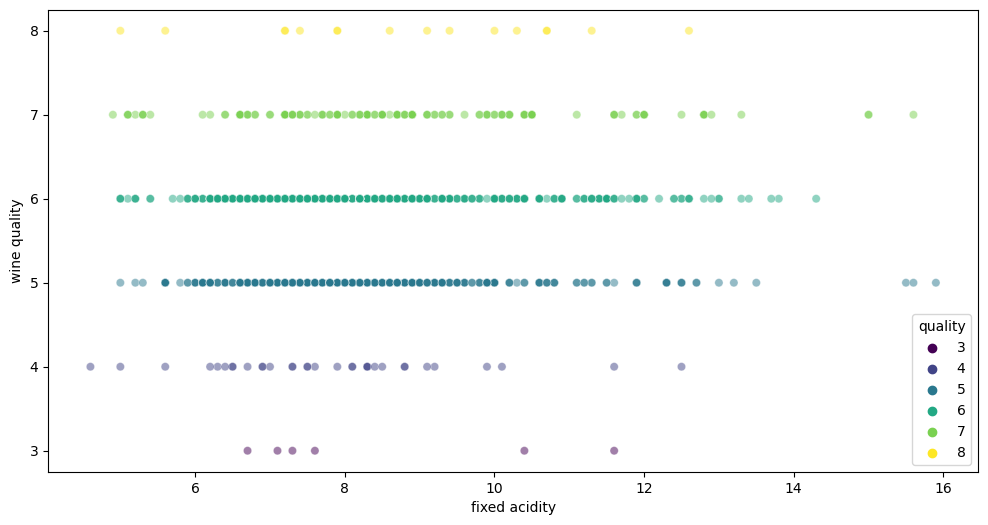

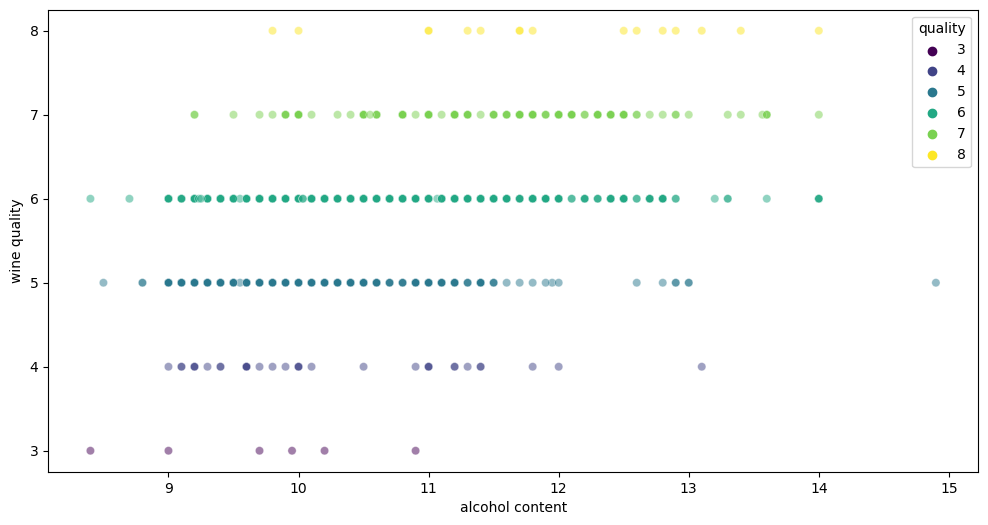

In [127]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='fixed acidity',y='quality',hue='quality',palette='viridis',alpha=0.5)
plt.title=('fixed acidity vs wine quality')
plt.xlabel('fixed acidity')
plt.ylabel('wine quality')
plt.show()


plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='alcohol',y='quality',hue='quality',palette='viridis',alpha=0.5)
plt.title=('alcohol content vs wine quality')
plt.xlabel('alcohol content')
plt.ylabel('wine quality')
plt.show()